<a href="https://colab.research.google.com/github/nsthomp5/MAT422/blob/main/MAT_422_HW_3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
# Name: Nicholas Thompson
# ID: 1223100502
# Class: MAT 422
# Assignment: HW 3.3

In [140]:
import scipy as sp
import sympy as sym
from scipy.optimize import minimize_scalar
import numpy as np
import math
import matplotlib.pyplot as plt

Minima and maxima of a function can be found whenever its derivative equals 0. This applies to machine learning algorithms such as gradient descent, where the goal is to minimize the loss function that determines the error between predicted and actual outcomes. The conditions for finding a local minimum is just finding a minimum within a certain domain. For gradient descent, using a 3-D representation shows how a surface has local minima anywhere a theoretical rolling object would rest. Gradient descent behaves this way in that it checks for if moving in any direction would reduce the loss function's output for that input. A formal definition for a local minimizer in this context would be that there must exist a neighborhood around a point such that the point is a global minimizer of that neighborhood.

In [141]:
# 3.3.1 Local Minimizers
# Example 1: Scalar Functions

def f(x): # Example Function
    return x**2 - 2*x + 1

result = minimize_scalar(f, bounds = [-2, 2], method='bounded') # Bounded method to find the minimizer within the specified domain (local)

print("Local minimizer:", result.x)
print("Minimum function value:", result.fun)

def f(x): # Example Function
    return x**3 - 5*x**2 + 3*x + 6

result = minimize_scalar(f, bounds = [0, 5], method='bounded') # Bounded method to find the minimizer within the specified domain (local)

print("Local minimizer:", result.x)
print("Minimum function value:", result.fun)

Local minimizer: 1.0000000000000002
Minimum function value: 0.0
Local minimizer: 3.0000006604512652
Minimum function value: -2.9999999999982574


The first derivative lets us check for local maxima and minima, with scipy aiding in directly minimizing a function at a root, but the second derivative allows us to check for convexity, which determines if a critical point (first derivative = 0) is a local maxima or a local minima. If the second derivative is positive at the critical point, the function is convex at that point and therefore it is a local minima if the first derivative also equals 0. This concept is most related to the gradient descent visual I discussed earlier. Determining whether a local minima is a global minima is based on checking the entire domain, which can be done with the brent method of scipy.optimize.minimize_scalar.

In [142]:
# 3.3.2 Convexity and Global Minimizers
# Example 1: Scalar Functions

x = sym.Symbol('x')

f = sym.sin(3*x) # Function with several local minima
f_prime = sym.diff(f, x) # SymPy derivatives
f_prime_prime = sym.diff(f_prime, x)

f_prime_check = f_prime.subs({x: (math.pi)/2}) # Checking for critical point
f_prime_prime_check = f_prime_prime.subs({x: (math.pi)/2}) # Checking for convexity

if f_prime_check < np.abs(10**-15): # Rounding errors, checking critical point conditions
  if f_prime_prime_check > 0: # Checking convexity for local minimum
    print("The function has a local minimum at x = pi/2")
  else:
    print("The function does not have a local minimum at x = pi/2")
else:
  print("The function does not have a local minimum at x = pi/2")









The function has a local minimum at x = pi/2


Gradient descent takes the single-variable methods of finding local minima and applies them to a multi-variable setting using partial derivatives to find local minimizers. Global minimizers can also be found using scipy's minimize method. Gradient descent was discussed in more detail before, but its applications are vast across the scope of machine learning as a tool for optimizing model training for both regression and classification by minimizing the loss or cost function. Its namesake comes from first: the gradient, which is a vector of the partial derivatives of a multivariable function and is used for optimization, and descent: which refers to the visual of descending on a surface until a local minimum is found. Picking the initial value within an expected ballpark helps find the global minimum, the smallest loss of all the local minima, and its associated input minimizer. Plotting the surface, among other methods, can help obtain a reasonable guess for where the global minimum can be found among the local minima.

In [143]:
# 3.3.3 Gradient Descent
# Example 1: Multivariable Functions

def gradient_descent_3d(f, gradient_f, initial_point, learning_rate, num_iterations):

  x = initial_point # initial guess
  for _ in range(num_iterations): # iterations of training
    gradient = gradient_f(x)
    x = x - learning_rate * gradient
  return x, f(x)


# Example usage:

def f(x):
  return 3*x[0]**2+5*x[1]**2-3*x[2]**2 # function to minimize

def gradient_f(x):
  return np.array([6*x[0],10*x[1],-3*x[2]]) # gradient of the function, obtained using partial derivatives


initial_point = np.array([3, 5, 7]) # initial guess (importance is closeness to local minima)
learning_rate = 0.1 # how far the minimum guess moves on the surface function with each iteration
num_iterations = 100 # how many iterations given to find a local minimum

final_point, final_value = gradient_descent_3d(f, gradient_f, initial_point, learning_rate, num_iterations) # returns final guess of minimizer and local minimum based on initial guess, learning rate, and number of iterations

print("Final point:", final_point)
print("Final value:", final_value)



Final point: [4.82081413e-40 0.00000000e+00 1.73553458e+12]
Final value: -9.036240810928941e+24


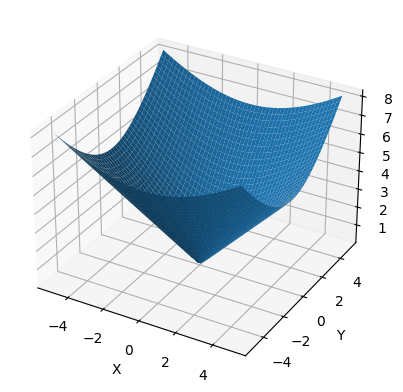

In [144]:
# Example 2: Surface Plot

def f(x, y): # function for z in terms of x and y
  return np.sqrt(x**2 + 5/3*y**2)

x = np.linspace(-5, 5, 50) # x and y bounded from [-5, 5]
y = np.linspace(-5, 5, 50)

X, Y = np.meshgrid(x, y) # returns coordinate pairs

# Calculate the function values for each point in the grid
values = f(X, Y)

# Create a 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, values)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()